# Caracterização dos dados
## Yelp Dataset Challenge 2019
### Autor: Heitor L. Werneck

- https://www.yelp.com/dataset
- https://www.yelp.com/dataset/documentation/main

Problemas

- par de amigos com redundancia. tabela friend. resolvido $\checkmark$
- business pode não ter categoria. resolvido $\checkmark$
- usuarios podem ter amigos que nao existem.
- so é possivel pegar o dia (não a hora) que uma pessoa deu review ou tip em um poi. Em check-in existe a hora porém não existe relacionamento com o usuário. $\checkmark$

Futuramente serão salvos os dataframes respectivos de todos objetos(json) na memória secundária em feather ou parquet.(foi salvo em csv)

As informações disponíveis do usuário estão listadas na primeira tabela abaixo.

As principais características dos pois disponiveis são: $<latitude,longitude,stars,categories,address,hours,is\_open>$

Os atributos que efetivamente serão importantes no trabalho e serão pegos do json e transformados em outro formato:

- business: business_id; name; city; latitude; longitude; stars; categories
- review: review_id; user_id; business_id; stars; date; # texto não será utilizado provavelmente, se for so mudar
- user: nada
- checkin: nada
- tip: user_id; business_id; date # não será utilizado pois não tem stars

O campo attributes pode dar informações por exemplo se existe uma garagem no local, está validado e entre outros. Esse tipo de dado pode ser utilizado em requeriment-awareness POI recommendation.

Tipos de informações sociais disponíveis do usuário:
- fans, número de fans que um usuário possui.
- friends, os amigos do usuário.
- compliments_xxxx elogios de diversos tipos feito pela comunidade a um usuário. Pode ser visto mais detalhadamente na tabela abaixo.
- votos useful, funny, cool. Caracterizações da comunidade a um review. O usuário também guarda um contador de votos de cada tipo.
- elite. Uma pessoa que faz bons reviews; tips de qualidade; perfil pessoal bem descrito; ativamente votando e elogiando; se da bem com as pessoas.


<table id="org4eb9158" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">
<caption class="t-above"><span class="table-number">Table 1:</span> Arquivos e campo.</caption>

<colgroup>
<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">Arquivo/Objeto</th>
<th scope="col" class="org-left">Campo</th>
<th scope="col" class="org-left">Descrição</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">business.json</td>
<td class="org-left">business\_id</td>
<td class="org-left">string, 22 character unique string business id</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">name</td>
<td class="org-left">string, the business's name</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">address</td>
<td class="org-left">string, the full address of the business</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">city</td>
<td class="org-left">string, the city</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">state</td>
<td class="org-left">string, 2 character state code, if applicable</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">postal code</td>
<td class="org-left">string, the postal code</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">latitude</td>
<td class="org-left">float, latitude</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">longitude</td>
<td class="org-left">float, longitude</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">stars</td>
<td class="org-left">float, star rating, rounded to half-stars</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">review\_count</td>
<td class="org-left">integer, number of reviews</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">is\_open</td>
<td class="org-left">integer, 0 or 1 for closed or open, respectively</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">attributes</td>
<td class="org-left">object, business attributes to values. note: some attribute values might be objects</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">categories</td>
<td class="org-left">an array of strings of business categories</td>
</tr>


<tr>
<td class="org-left">business.json</td>
<td class="org-left">hours</td>
<td class="org-left">an object of key day to value hours, hours are using a 24hr clock</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">review\_id</td>
<td class="org-left">string, 22 character unique review id</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">user\_id</td>
<td class="org-left">string, 22 character unique user id, maps to the user in user.json</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">business\_id</td>
<td class="org-left">string, 22 character business id, maps to business in business.json</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">stars</td>
<td class="org-left">integer, star rating</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">date</td>
<td class="org-left">string, date formatted YYYY-MM-DD</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">text</td>
<td class="org-left">string, the review itself</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">useful</td>
<td class="org-left">integer, number of useful votes received</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">funny</td>
<td class="org-left">integer, number of funny votes received</td>
</tr>


<tr>
<td class="org-left">review.json</td>
<td class="org-left">cool</td>
<td class="org-left">integer, number of cool votes received</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">user\_id</td>
<td class="org-left">string, 22 character unique user id, maps to the user in user.json</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">name</td>
<td class="org-left">string, the user's first name</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">review\_count</td>
<td class="org-left">integer, the number of reviews they've written</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">yelping\_since</td>
<td class="org-left">string, when the user joined Yelp, formatted like YYYY-MM-DD</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">friends</td>
<td class="org-left">array of strings, an array of the user's friend as user\_ids</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">useful</td>
<td class="org-left">integer, number of useful votes sent by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">funny</td>
<td class="org-left">integer, number of funny votes sent by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">cool</td>
<td class="org-left">integer, number of cool votes sent by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">fans</td>
<td class="org-left">integer, number of fans the user has</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">elite</td>
<td class="org-left">array of integers, the years the user was elite</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">average\_stars</td>
<td class="org-left">float, average rating of all reviews</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_hot</td>
<td class="org-left">integer, number of hot compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_more</td>
<td class="org-left">integer, number of more compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_profile</td>
<td class="org-left">integer, number of profile compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_cute</td>
<td class="org-left">integer, number of cute compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_list</td>
<td class="org-left">integer, number of list compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_note</td>
<td class="org-left">integer, number of note compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_plain</td>
<td class="org-left">integer, number of plain compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_cool</td>
<td class="org-left">integer, number of cool compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_funny</td>
<td class="org-left">integer, number of funny compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_writer</td>
<td class="org-left">integer, number of writer compliments received by the user</td>
</tr>


<tr>
<td class="org-left">user.json</td>
<td class="org-left">compliment\_photos</td>
<td class="org-left">integer, number of photo compliments received by the user</td>
</tr>


<tr>
<td class="org-left">checkin.json</td>
<td class="org-left">business\_id</td>
<td class="org-left">string, 22 character business id, maps to business in business.json</td>
</tr>


<tr>
<td class="org-left">checkin.json</td>
<td class="org-left">date</td>
<td class="org-left">string which is a comma-separated list of timestamps for each checkin, each with format YYYY-MM-DD HH:MM:SS</td>
</tr>


<tr>
<td class="org-left">tip.json</td>
<td class="org-left">text</td>
<td class="org-left">string, text of the tip</td>
</tr>


<tr>
<td class="org-left">tip.json</td>
<td class="org-left">date</td>
<td class="org-left">string, when the tip was written, formatted like YYYY-MM-DD</td>
</tr>


<tr>
<td class="org-left">tip.json</td>
<td class="org-left">compliment\_count</td>
<td class="org-left">integer, how many compliments it has</td>
</tr>


<tr>
<td class="org-left">tip.json</td>
<td class="org-left">business\_id</td>
<td class="org-left">string, 22 character business id, maps to business in business.json</td>
</tr>


<tr>
<td class="org-left">tip.json</td>
<td class="org-left">user\_id</td>
<td class="org-left">string, 22 character unique user id, maps to the user in user.json</td>
</tr>


<tr>
<td class="org-left">photo.json</td>
<td class="org-left">photo\_id</td>
<td class="org-left">string, 22 character unique photo id</td>
</tr>


<tr>
<td class="org-left">photo.json</td>
<td class="org-left">business\_id</td>
<td class="org-left">string, 22 character business id, maps to business in business.json</td>
</tr>


<tr>
<td class="org-left">photo.json</td>
<td class="org-left">caption</td>
<td class="org-left">string, the photo caption, if any</td>
</tr>


<tr>
<td class="org-left">photo.json</td>
<td class="org-left">label</td>
<td class="org-left">string, the category the photo belongs to, if any</td>
</tr>
</tbody>
</table>


In [1]:
import json
import pandas as pd
import numpy as np
fbusiness=open("../data/business.json")
fcheckin=open("../data/checkin.json")
fuser=open("../data/user.json")
freview=open("../data/review.json")
ftip=open("../data/tip.json")
fphoto=open("../data/photo.json")
featured_cities=["Las Vegas","Phoenix","Charlotte"]
df= pd.DataFrame()

# Número de cidades

In [2]:
all_data = list()
for i, line in enumerate(fbusiness):  
    # json to dict
    business_json = json.loads(line)
    # add to the data collection
    all_data.append(business_json['city'])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['city'])
print("Número de cidades: ",len(df.city.unique()))
# free memory
df=[]
all_data=[]

Número de cidades:  1204


# business and user dataframe

In [3]:
all_data = list()
fbusiness.seek(0)
for i, line in enumerate(fbusiness):  
    # json to dict
    business_json = json.loads(line)
    # add to the data collection
    all_data.append(business_json['business_id'])
# create the DataFrame
df_business = pd.DataFrame(all_data, columns=['business_id'])

all_data = list()
for i, line in enumerate(fuser):  
    # json to dict
    user_json = json.loads(line)
    # add to the data collection
    all_data.append(user_json['user_id'])
df_user = pd.DataFrame(all_data, columns=['user_id'])

# Número de usuários e business

In [4]:
print(df_business.count())
df_business=[]

business_id    192609
dtype: int64


In [5]:
print(df_user.count())
df_user=[]

user_id    1637138
dtype: int64


# dataframe com user\_id,business\_id e city.
# Primeiro pega os usuários dos pois através do review

In [6]:
df = pd.DataFrame(columns=['user_id','business_id'])
all_data = list()
freview.seek(0)
for i, line in enumerate(freview):  
    if i%300000==0:
        print(i)
    # json to dict
    review_json = json.loads(line)
    # add to the data collection
    all_data.append([review_json['user_id'],review_json['business_id']])

all_data=pd.DataFrame(all_data, columns=['user_id','business_id'])
## append all users of review
df = df.append(all_data).drop_duplicates().reset_index(drop=True)
all_data=[]

0
300000
600000
900000
1200000
1500000
1800000
2100000
2400000
2700000
3000000
3300000
3600000
3900000
4200000
4500000
4800000
5100000
5400000
5700000
6000000
6300000
6600000


In [7]:
print(df.head())
print(df.count())

                  user_id             business_id
0  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg
1  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ
2  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw
3  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA
4  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ
user_id        6461396
business_id    6461396
dtype: int64


# Pega usuários através dos tips

In [8]:
all_data = list()
for i, line in enumerate(ftip):  
    if i%300000==0:
        print(i)
    # json to dict
    tip_json = json.loads(line)
    # add to the data collection
    all_data.append([tip_json['user_id'],tip_json['business_id']])

all_data=pd.DataFrame(all_data, columns=['user_id','business_id'])
## append all users of tip
df = df.append(all_data).drop_duplicates().reset_index(drop=True)

all_data=[]

0
300000
600000
900000
1200000


In [9]:
print(df.head())
print(df.count())


                  user_id             business_id
0  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg
1  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ
2  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw
3  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA
4  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ
user_id        7118613
business_id    7118613
dtype: int64


# Cria efetivamente a tripla mencionada anteriormente através da função merge

In [10]:
all_data = list()
fbusiness.seek(0)
for i, line in enumerate(fbusiness):  
    # json to dict
    business_json = json.loads(line)
    # add to the data collection
    all_data.append([business_json['business_id'],business_json['city']])

df_business=pd.DataFrame(all_data, columns=['business_id','city'])

df = pd.merge(df,df_business,left_on='business_id',right_on='business_id').drop_duplicates().reset_index(drop=True)
df_business=[]

df.head()

,user_id,business_id,city
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,Las Vegas
1,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg,Las Vegas
2,x3brMMbJrAW9PwW5A6YL5w,ujmEBvifdJM6h6RLv4wQIg,Las Vegas
3,Skzdl0sWhW88525a1vr59g,ujmEBvifdJM6h6RLv4wQIg,Las Vegas
4,3Y25VDfnQVcuc33T-U3Z6A,ujmEBvifdJM6h6RLv4wQIg,Las Vegas


# Quantidade de usuários em cada cidade

In [11]:
df_user_city = df[['user_id','city']].drop_duplicates().groupby('city').count().rename(columns={'user_id':'Users'})
df_user_city.head()

,Users
city,
,3
110 Las Vegas,74
AGINCOURT,10
AVON,17
AZ,3


# Quantidade de pois em cada cidade

In [12]:
df_poi_city= df[['business_id','city']].drop_duplicates().groupby('city').count().rename(columns={'business_id':'POIs'})
df_poi_city.head()

,POIs
city,
,1
110 Las Vegas,1
AGINCOURT,1
AVON,1
AZ,1


# Esparsidade das cidades.
Primeiro é pego a quantidade máxima de "células" de uma matriz virtual $USER\times POI$ WHERE POI.city="city_name". Depois disso basta usar a fórmula $1-\frac{CelulasPreenchidas}{MaxCelulas}$.

In [13]:
temp1=pd.DataFrame(df_poi_city.values*df_user_city.values, columns=df_poi_city.columns, index=df_poi_city.index).rename(columns={'POIs':'Max'})

print(temp1)

temp2=df[['user_id','city']].drop_duplicates().reset_index(drop=True)\
.groupby('city').count().rename(columns={'user_id':'Users'})

print(temp2)
city_sparsity=pd.DataFrame(1-temp2.values/temp1.values,columns=["Sparsity"],index=temp1.index)
print(city_sparsity)

temp1=None
temp2=None
# desaloca dataframe city,poi,user
df=[]
#df[['business_id','city']].drop_duplicates().groupby('city').count().rename(columns={'user_id':'Users'})

                Max
city               
                  3
110 Las Vegas    74
AGINCOURT        10
AVON             17
AZ                3
...             ...
toronto          66
verdun            9
Île des Soeurs   48
Île-des-Soeurs    5
​Chandler        20

[1204 rows x 1 columns]
                Users
city                 
                    3
110 Las Vegas      74
AGINCOURT          10
AVON               17
AZ                  3
...               ...
toronto            22
verdun              9
Île des Soeurs     48
Île-des-Soeurs      5
​Chandler          20

[1204 rows x 1 columns]
                Sparsity
city                    
                0.000000
110 Las Vegas   0.000000
AGINCOURT       0.000000
AVON            0.000000
AZ              0.000000
...                  ...
toronto         0.666667
verdun          0.000000
Île des Soeurs  0.000000
Île-des-Soeurs  0.000000
​Chandler       0.000000

[1204 rows x 1 columns]


# Esparsidades de algumas cidades

In [14]:
print(city_sparsity.loc['Las Vegas'],
city_sparsity.loc['Phoenix'],
city_sparsity.loc['Charlotte'],sep='\n')

Sparsity    0.999966
Name: Las Vegas, dtype: float64
Sparsity    0.999947
Name: Phoenix, dtype: float64
Sparsity    0.999895
Name: Charlotte, dtype: float64


# Conteúdo extra
Aqui os dados serão explorados para auxiliar na criação de um programa para recomendação. Ou seja, os dados que são necessários para uma recomendação serão colocados no formato de dataframe.

## Check-in e POIS
O check-in foi obtido usando os reviews e tips em um poi(business).

Foi feito um dataframe que possui o id do usuário, o id do poi(business) e a quantidade de reviews e tips.

É importante notar que o usuário pode ter dado um tip e review no mesmo dia. Poderia contar como 1 check-in um tip e review no mesmo dia. Mas será que o usuário não foi uma vez e deu review depois um tip? É dificil saber o que aconteceu. Pode ter ocorrido realmente 2 check-ins.

In [1]:
import json
import pandas as pd
import numpy as np
fbusiness=open("business.json")
fcheckin=open("checkin.json")
fuser=open("user.json")
freview=open("review.json")
ftip=open("tip.json")
fphoto=open("photo.json")
featured_cities=["Las Vegas","Phoenix","Charlotte"]
df= pd.DataFrame()

df = pd.DataFrame(columns=['user_id','business_id'])
all_data = list()
freview.seek(0)
for i, line in enumerate(freview):  
    if i%600000==0:
        print(i)
    # json to dict
    review_json = json.loads(line)
    # add to the data collection
    all_data.append([review_json['user_id'],review_json['business_id']])

all_data=pd.DataFrame(all_data, columns=['user_id','business_id'])
## append all users of review
df = df.append(all_data)
print("Count:",df.count())

all_data = list()
for i, line in enumerate(ftip):  
    if i%600000==0:
        print(i)
    # json to dict
    tip_json = json.loads(line)
    # add to the data collection
    all_data.append([tip_json['user_id'],tip_json['business_id']])

all_data=pd.DataFrame(all_data, columns=['user_id','business_id'])
## append all users of tip
df = df.append(all_data)
print("Count:",df.count())

df['Count']=df.groupby(['business_id','user_id'])['user_id'].transform('count')

print(df.head())
all_data=[]


0
600000
1200000
1800000
2400000
3000000
3600000
4200000
4800000
5400000
6000000
6600000
Count: user_id        6685900
business_id    6685900
dtype: int64
0
600000
1200000
Count: user_id        7908994
business_id    7908994
dtype: int64
                  user_id             business_id  Count
0  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg      2
1  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ      1
2  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw      1
3  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA      1
4  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ      1


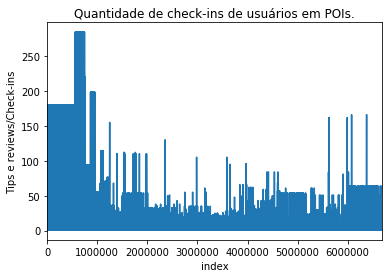

In [4]:
pl = df['Count'].plot(title='Quantidade de check-ins de usuários em POIs.')
pl.set_ylabel('Tips e reviews/Check-ins')
pl.set_xlabel('index')

pl=[]

In [7]:
# 
df['Count'].describe()

count    7.908994e+06
mean     1.424507e+00
std      3.834914e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.840000e+02
Name: Count, dtype: float64

## Número de 'check-ins'(tips e reviews) dos POIs.

In [7]:
# muito lento, poderia ser feito lá atrás sendo executado mais rápido porém não séria possivel explorar os dados linearmente' como está sendo feito. << Isso que foi escrito talvez seja verdade
df[['business_id','Count']].groupby('business_id').sum().reset_index(level=0).head()

,business_id,Count
0,--1UhMGODdWsrMastO9DZw,33
1,--6MefnULPED_I942VcFNA,84
2,--7zmmkVg-IMGaXbuVd0SQ,84
3,--8LPVSo5i0Oo61X01sV9A,4
4,--9QQLMTbFzLJ_oT-ON3Xw,27


## Número de 'check-ins'(tips e reviews) das cidades.

In [8]:
all_data = list()
fbusiness.seek(0)
for i, line in enumerate(fbusiness):  
    # json to dict
    business_json = json.loads(line)
    # add to the data collection
    all_data.append([business_json['business_id'],business_json['city']])

df_business=pd.DataFrame(all_data, columns=['business_id','city'])

df_temp = pd.merge(df[['business_id','Count']].groupby('business_id').sum().reset_index(level=0),df_business,left_on='business_id',right_on='business_id')[['Count','city']].groupby('city').sum()
df_business=[]
print(df_temp.sort_values(by=['Count'],ascending=[0]).head())
df_temp=[]

              Count
city               
Las Vegas   3746876
Phoenix     1216025
Toronto      768417
Scottsdale   663185
Charlotte    476125


## Most-Popular aplicado a base.

In [16]:
base=df[['business_id','Count']].groupby('business_id').sum().reset_index(level=0)
df=[]




In [17]:
def mostpopular(dataset):
    return dataset.sort_values(['Count'],ascending=[0]).head(10)
rec_list=mostpopular(base)
rec_list

,business_id,Count
98230,V_TxEdzeEs8P5nGPANOY7A,80865
89867,Somjllgzu0BxzsSck9V2wQ,48858
95633,Ujn9v6liwPXOBA2wYzaS1A,39376
185734,xiNJk32NYbXdL-T3PzE3lQ,32806
34461,AV6weBrZFFBfRGCbcRGO4g,31430
161829,pjG0x0xAyaq92KP8ycg4jQ,27901
178591,vMRWkz0wb3g4HjW_OeAppA,27559
149815,llZrbubcGWC-kXShnJLyQg,26288
8573,1s3WA23Cac_p0xWu7mB18A,24072
106047,YBLVD61RFdP5H-RGLSIPUw,19021


In [23]:
rec_list=_
rec_list.reset_index(drop=True,inplace=True)
rec_list

,business_id,Count
0,V_TxEdzeEs8P5nGPANOY7A,80865
1,Somjllgzu0BxzsSck9V2wQ,48858
2,Ujn9v6liwPXOBA2wYzaS1A,39376
3,xiNJk32NYbXdL-T3PzE3lQ,32806
4,AV6weBrZFFBfRGCbcRGO4g,31430
5,pjG0x0xAyaq92KP8ycg4jQ,27901
6,vMRWkz0wb3g4HjW_OeAppA,27559
7,llZrbubcGWC-kXShnJLyQg,26288
8,1s3WA23Cac_p0xWu7mB18A,24072
9,YBLVD61RFdP5H-RGLSIPUw,19021


# Número médio de vezes que um usuário visita um POI

In [1]:
import pandas as pd
df=pd.read_csv('../data/review.csv',usecols=['user_id','business_id'])

In [2]:
df['Count']=df.groupby(['business_id','user_id'])['user_id'].transform('count')

In [3]:
df.head()

,user_id,business_id,Count
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,2
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,1
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,1
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,1
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1


In [5]:
tmp_merge=pd.merge(\
df[['user_id','Count']].groupby('user_id').sum().reset_index(level=0),\
df[['user_id','business_id']].groupby('user_id').count().reset_index(level=0).rename(columns={"business_id":"diffpoisvisited"}),\
left_on='user_id',right_on='user_id')
tmp_merge.head(10)

,user_id,Count,diffpoisvisited
0,---1lKK3aKOuomHnwAkAow,138,128
1,---89pEy_h9PvHwcHNbpyg,1,1
2,---94vtJ_5o_nikEs6hUjg,4,4
3,---PLwSf5gKdIoVnyRHgBA,2,2
4,---cu1hq55BP9DWVXXKHZg,3,3
5,---fhiwiwBYrvqhpXgcWDQ,1,1
6,---udAKDsn0yQXmzbWQNSw,2,2
7,--0LlX_UcypHnxW-4BUAdA,1,1
8,--0RtXvcOIE4XbErYca6Rw,1,1
9,--0VhLFv2XfEKHL0YSCSuw,1,1


In [6]:
tmp_merge['meanpoivisits']=tmp_merge['Count']/tmp_merge['diffpoisvisited']
tmp_merge[['user_id','meanpoivisits']].head(10)

,user_id,meanpoivisits
0,---1lKK3aKOuomHnwAkAow,1.078125
1,---89pEy_h9PvHwcHNbpyg,1.000000
2,---94vtJ_5o_nikEs6hUjg,1.000000
3,---PLwSf5gKdIoVnyRHgBA,1.000000
4,---cu1hq55BP9DWVXXKHZg,1.000000
5,---fhiwiwBYrvqhpXgcWDQ,1.000000
6,---udAKDsn0yQXmzbWQNSw,1.000000
7,--0LlX_UcypHnxW-4BUAdA,1.000000
8,--0RtXvcOIE4XbErYca6Rw,1.000000
9,--0VhLFv2XfEKHL0YSCSuw,1.000000


In [7]:
tmp_merge[['user_id','meanpoivisits']].sort_values(by='meanpoivisits',ascending=False).head(10)

,user_id,meanpoivisits
530812,JlQ-9fc61X9lbzZN6ZjORQ,16.182131
1428464,rpVSDBaeDEDhFNQHZIxg8w,12.375000
945386,ZwfAsk83HofYTimNA7wrvQ,11.636364
377087,Dl05etq6qzMf5NOskjb7Ag,11.576923
1614321,z60tKk_Fw6toEbu_s-v7aA,11.000000
1407904,r1idJyayfkJoDwfkMWJKqQ,11.000000
637450,Nws4zPJP1n40BtufBUaI7Q,10.571429
1237408,kLT95trAg0r0irSALdnJog,10.166667
461717,H3FZ4chGpdm1GzkwUWK3Ng,9.666667
1522755,vWOc4cnPchZILKsEQ9cxcg,9.461538


# Pré-processamento para filtragem dos dados

Perguntas: qual a ordem de filtragem?

In [1]:
import pandas as pd

df_review=pd.read_csv("../data/review.csv",usecols=['user_id','business_id'])

In [2]:
df_review.count()

user_id        6685900
business_id    6685900
dtype: int64

In [3]:
# df_diff_users_visited contain pois visited by 5>= different users
df_diff_users_visited=df_review.drop_duplicates().reset_index(drop=True).groupby('business_id').count().reset_index().rename(columns={"user_id":"diffusersvisited"})
df_diff_users_visited=df_diff_users_visited[df_diff_users_visited['diffusersvisited']>=5]
del df_diff_users_visited['diffusersvisited']
df_diff_users_visited.count()

business_id    140162
dtype: int64

In [4]:
# filtering in df_review
df_review=pd.merge(df_review,df_diff_users_visited,on='business_id',how='inner')
df_diff_users_visited=None
#df_review=df_review[df_review['business_id']==df_diff_users_visited['business_id']]

In [8]:
df_review.head()

,user_id,business_id
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg
1,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg
2,x3brMMbJrAW9PwW5A6YL5w,ujmEBvifdJM6h6RLv4wQIg
3,Skzdl0sWhW88525a1vr59g,ujmEBvifdJM6h6RLv4wQIg
4,3Y25VDfnQVcuc33T-U3Z6A,ujmEBvifdJM6h6RLv4wQIg


In [6]:
df_review.count()

user_id        6505673
business_id    6505673
dtype: int64

In [9]:
df_business=pd.read_csv("../data/business.csv",usecols=['business_id','city'])

In [10]:
df = pd.merge(df_review,df_business,on='business_id').drop_duplicates().reset_index(drop=True)
df_business=None



df_review=None
del df['business_id']

In [11]:
df.head()

,user_id,city
0,hG7b0MtEbXx5QzbzE6C_VA,Las Vegas
1,RBXSJA372ilErzNwz0jXvQ,Las Vegas
2,x3brMMbJrAW9PwW5A6YL5w,Las Vegas
3,Skzdl0sWhW88525a1vr59g,Las Vegas
4,3Y25VDfnQVcuc33T-U3Z6A,Las Vegas


In [12]:
# usuarios que fizeram 20 ou mais check-ins na cidade alvo
df['Count']=df.groupby(['city','user_id'])['user_id'].transform('count')
df=df[df['Count']>=20]
del df['Count']
df.head()

,user_id,city
9,46TNf-5T5EcNFRJPYv_nrw,Las Vegas
10,56iEnLi8jR--2ranjPSQ4w,Las Vegas
11,i5aJIiQk91PK9Z0aYJpOrg,Las Vegas
20,Nw6Jza_cb0aqd4PT769Vzw,Las Vegas
26,3b5EsiTkqgdbxPXz7LfBpA,Las Vegas
